### Projeto Final Para Conclusão do Curso de Cientista de Dados

Instituição: Infnet

Aluno: Marcio Carvalho

Projeto: Predição da expectativa de vida no mundo de acordo diversos fatores de saúde e sócio econômicos.

Dados: O repositório de dados é da Global Health Observatory (GHO), portal de conjunto de dados da Organização Mundial da Saúde (OMS) para estatísticas relacionadas à saúde de 183 Estados Membros. Os dados econômicos correspondentes foram coletados do site das Nações Unidas. Inicialmente os respectivos dados foram coletados e organizados no Site: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who. pelo responsável KumarRajarshi.
             


Período: 2000-2015

As colunas a seguir estão incluídas no conjunto de dados:

• Country: país - 193 países

• year: Anos (2000 - 2015)

• Status: país desenvolvido ou em desenvolvimento

• Adult Mortality: Taxas de mortalidade adulta de ambos os sexos (probabilidade de morrer entre 15 e 60 anos por 1000 habitantes)

• infant Deaths: Número de óbitos infantis por 1.000 habitantes

• Alcohol: Álcool, consumo registrado per capita (15+) (em litros de álcool puro)

• percentage expenditure: Despesa percentual - Gastos com saúde como porcentagem do Produto Interno Bruto per capita (%)

• Hepatitis B: Cobertura vacinal contra hepatite B (HepB) em crianças de 1 ano (%)

• Measles: Sarampo - número de casos notificados por 1000 habitantes

• BMI: Índice de Massa Corporal Médio de toda a população

• under-five deathes: Número de mortes de menores de cinco anos por 1000 habitantes

• Polio: Cobertura vacinal contra pólio (Pol3) em crianças de 1 ano (%)

• Total expenditure: Despesas totais - Gastos do governo geral com saúde como porcentagem do gasto total do governo (%)

• Polio: Cobertura vacinal contra pólio (Pol3) em crianças de 1 ano (%)

• Diphtheria: Difteria - Cobertura vacinal contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano de idade (%)

• HIV/AIDS: Mortes por 1000 nascidos vivos HIV/AIDS (0-4 anos)

• GDP: Produto Interno Bruto per capita (em USD)

• Population: População do país

• thinness 1-19 years: Prevalência de magreza em crianças e adolescentes de 1 a 19 anos (%)

• thinness 5-9 years: Prevalência de magreza em crianças de 5 a 9 anos (%)

• Income composition of resources: Índice de Desenvolvimento Humano em termos de composição de renda dos recursos (índice variando de 0 a 1)

• Schooling: Número de anos de escolaridade (anos)

• Life Expectancy: Expectativa de vida em anos (coluna Alvo)


### Análise Exploratória e Preparação dos dados

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
pd.set_option('display.max_columns',None)
df.columns = ['PaIs','Ano','Classificacao','Expectativa_de_Vida','Taxa_Mortalidade_Adulto','Numero_Obito_Infantil','Consumo_Alcool','Gastos_Com_Saude','Hepatite_B','Sarampo','Indice_Massa_Corporal','Mortes_Menores_5anos','Cobertura_Polio','Relacao_GastosSaude/despesasTotais','Cobertura_Difeteria','Mortes_criancas_0-4a_Hiv_aids','PIB','Populacao','Magreza_1-19anos','Magreza_5-9anos','IDH','Anos_de_Escolaridade']
df.head()

,PaIs,Ano,Classificacao,Expectativa_de_Vida,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,Indice_Massa_Corporal,Mortes_Menores_5anos,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
orig_df = df.copy()

In [4]:
df.shape

(2938, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   PaIs                                2938 non-null   object 
 1   Ano                                 2938 non-null   int64  
 2   Classificacao                       2938 non-null   object 
 3   Expectativa_de_Vida                 2928 non-null   float64
 4   Taxa_Mortalidade_Adulto             2928 non-null   float64
 5   Numero_Obito_Infantil               2938 non-null   int64  
 6   Consumo_Alcool                      2744 non-null   float64
 7   Gastos_Com_Saude                    2938 non-null   float64
 8   Hepatite_B                          2385 non-null   float64
 9   Sarampo                             2938 non-null   int64  
 10  Indice_Massa_Corporal               2904 non-null   float64
 11  Mortes_Menores_5anos                2938 no

In [6]:
df.dropna(axis=0, how='all') # Verifica se há linhas totalmente nulas e exclui do dataframe

,PaIs,Ano,Classificacao,Expectativa_de_Vida,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,Indice_Massa_Corporal,Mortes_Menores_5anos,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


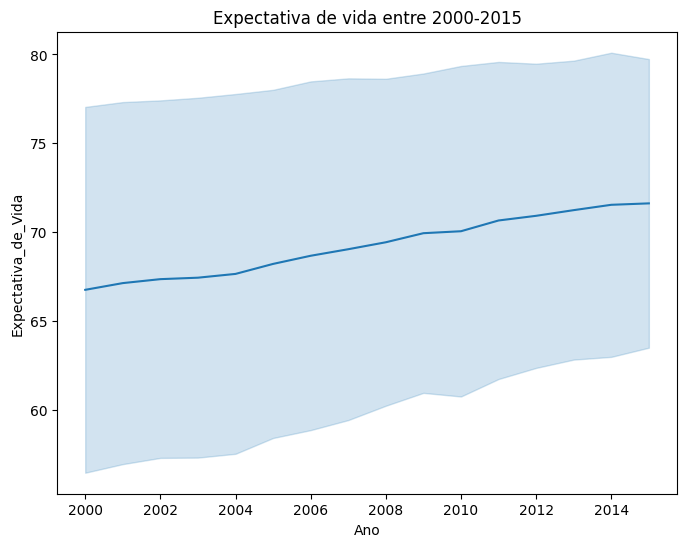

In [7]:
# Dimensionando a área de plotagem 
plt.figure(figsize=(8,6))
# Gerando gráfico de linha no Seaborn
ax = sns.lineplot(data=df,x='Ano', y='Expectativa_de_Vida',ci='sd')
# Gerando Título no gráfico
plt.title('Expectativa de vida entre 2000-2015')
# Salvando o gráfico em arquivo png na pasta no projeto
ax.get_figure().savefig("Crescimento_expectativa_de_vida.png")

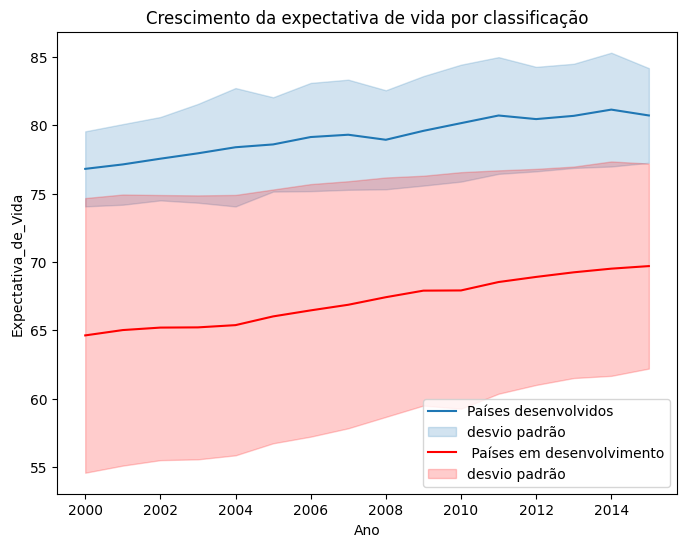

In [8]:
# Filtrando dataframe apenas com países desenvolvidos
df_desenvolvido = df[df['Classificacao']=='Developed']
# Filtrando dataframe apenas com países emdesenvolvimento
df_emdesenvolvimento = df[df['Classificacao']=='Developing']
plt.figure(figsize=(8,6))
ax = sns.lineplot(data=df_desenvolvido,x='Ano', y='Expectativa_de_Vida', ci='sd')
ax = sns.lineplot(data=df_emdesenvolvimento,x='Ano', y='Expectativa_de_Vida',color='red',ci='sd')
# Inserindo descritivo na legenda
plt.legend(['Países desenvolvidos','desvio padrão',' Países em desenvolvimento','desvio padrão'],loc=4)
plt.title('Crescimento da expectativa de vida por classificação')
ax.get_figure().savefig("Crescimento_expectativa_de_vida_por_classificação.png")


In [9]:
# dividindo o dataframe 500 linhas para melhorar visualização
df_sample = df.sample(n=500)
# gerando gráfico com plotly para melhorá interação com os dados
#plt.title('Exemplo de correlação positiva')
fig  = px.scatter(df_sample, x='IDH', y = 'Expectativa_de_Vida', log_x = True, width = 700,hover_name = "PaIs", title='Correlação Positiva')
#layout = px.Layout(title='Preços por ano de construção')
#fig.get_figure().savefig("Correlação_positiva.png")
fig

In [10]:
df_sample = df.sample(n=1000)
fig  = px.scatter(df_sample, x='Taxa_Mortalidade_Adulto', y = 'Expectativa_de_Vida', log_x = True, width = 700,hover_name = "PaIs",title='Correlação Negativa')
fig

In [42]:
fig  = px.scatter(df, x='Consumo_Alcool', y='Expectativa_de_Vida', log_x = True, width = 700,hover_name = "PaIs",facet_col = 'Classificacao', title='Consumo de Álcool por Classificação')
fig

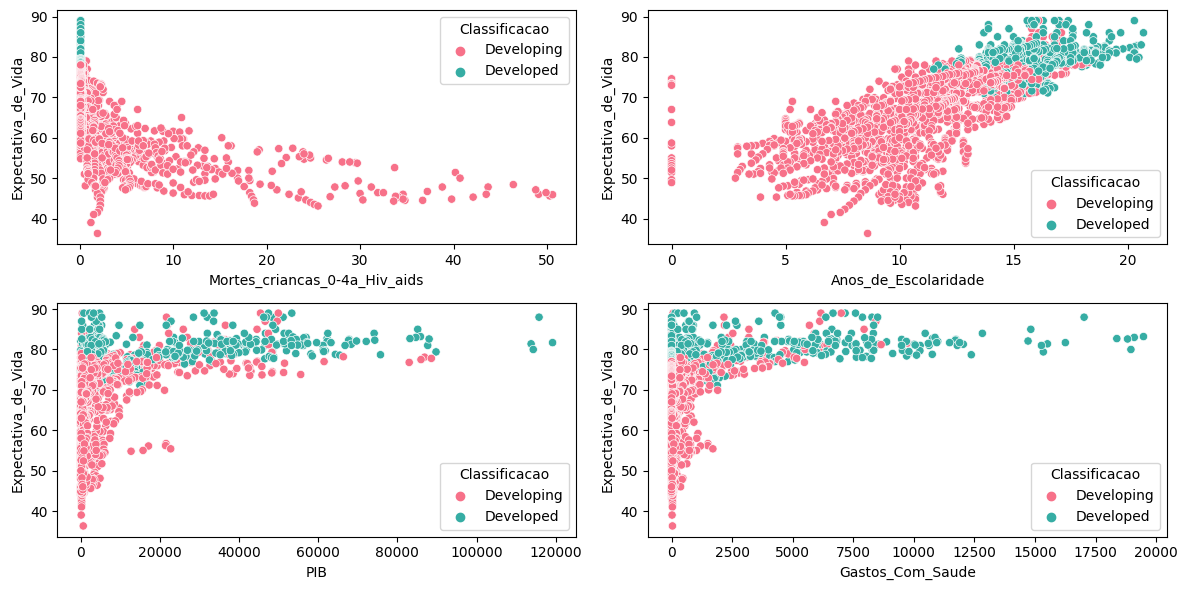

In [12]:
coluna = ['Mortes_criancas_0-4a_Hiv_aids','Anos_de_Escolaridade','PIB','Gastos_Com_Saude']
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
axs = axs.flatten()
 # colocar titulo
for i,var in enumerate(coluna):
    ax = sns.scatterplot(x=var, y='Expectativa_de_Vida',hue='Classificacao',palette='husl', data=df, ax=axs[i])
    ax.get_figure().savefig("Dispersão de variaveis.png")
fig.tight_layout()

In [13]:
# Brasil
Brasil = df.query('PaIs=="Brazil"')
#df.query('Classificacao "developing== Brasil"')
Brasil


,PaIs,Ano,Classificacao,Expectativa_de_Vida,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,Indice_Massa_Corporal,Mortes_Menores_5anos,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
352,Brazil,2015,Developing,75.0,142.0,42,NaN,0.000000,96.0,214,56.1,47,98.0,NaN,96.0,0.1,8757.262200,2596218.0,2.7,2.6,0.754,15.2
353,Brazil,2014,Developing,74.8,144.0,44,7.32,83.164654,96.0,876,55.3,49,96.0,8.32,93.0,0.1,1226.617310,24213133.0,2.7,2.7,0.747,15.2
354,Brazil,2013,Developing,74.7,146.0,46,7.24,916.270845,96.0,220,54.5,52,96.0,8.48,97.0,0.1,12216.944600,2248632.0,2.8,2.7,0.734,14.2
355,Brazil,2012,Developing,74.5,148.0,49,7.55,843.194626,96.0,2,53.6,54,96.0,8.26,95.0,0.1,12291.466850,256983.0,2.8,2.8,0.730,14.2
356,Brazil,2011,Developing,74.1,152.0,51,7.58,1084.999766,98.0,43,52.8,57,98.0,8.90,99.0,0.1,13167.472890,198686688.0,2.9,2.8,0.724,14.0
357,Brazil,2010,Developing,73.8,154.0,54,7.52,1111.191325,96.0,68,52.0,61,99.0,8.27,99.0,0.1,11224.154800,196796269.0,2.9,2.9,0.716,13.8
358,Brazil,2009,Developing,73.6,157.0,57,7.33,564.523390,99.0,0,51.1,64,99.0,8.65,99.0,0.1,8553.384700,194895996.0,3.0,2.9,0.714,13.8
359,Brazil,2008,Developing,73.4,158.0,61,7.21,526.378064,96.0,0,5.3,68,99.0,8.24,99.0,0.1,8787.613750,19297929.0,3.0,3.0,0.704,13.3
360,Brazil,2007,Developing,73.3,159.0,65,7.19,394.932130,99.0,0,49.4,73,99.0,8.28,99.0,0.1,7313.557962,19126637.0,3.1,3.0,0.700,13.5
361,Brazil,2006,Developing,73.0,161.0,70,7.10,30.303747,99.0,57,48.6,79,99.0,8.36,99.0,0.1,586.145975,18912412.0,3.1,3.1,0.698,13.8


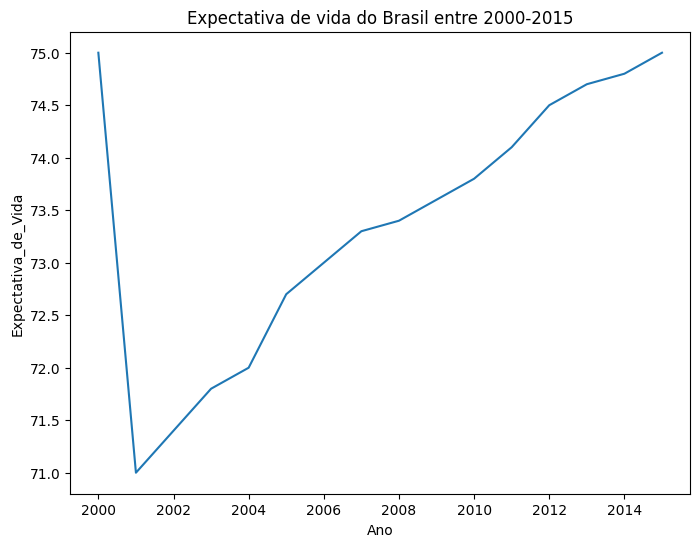

In [14]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(data=Brasil,x='Ano', y='Expectativa_de_Vida',ci='sd')
plt.title('Expectativa de vida do Brasil entre 2000-2015')
ax.get_figure().savefig("Crescimento_expectativa_de_vida_Brasil.png")

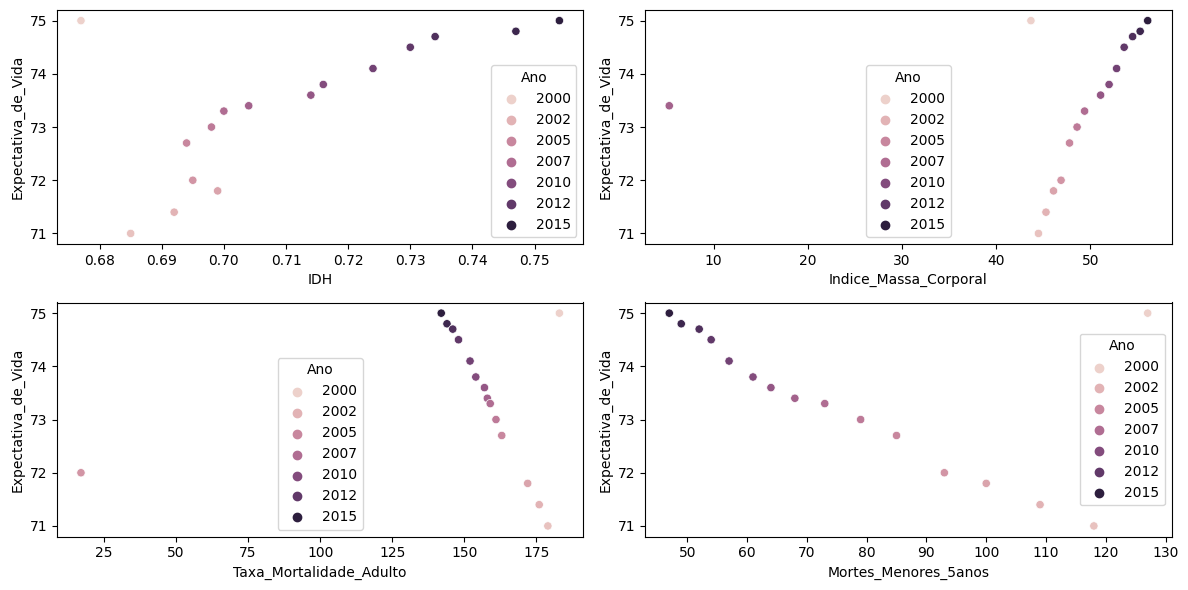

In [15]:
# Indicadores do Brasil
coluna = ['IDH','Indice_Massa_Corporal','Taxa_Mortalidade_Adulto','Mortes_Menores_5anos']
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
axs = axs.flatten()
 # colocar titulo
for i,var in enumerate(coluna):
    ax = sns.scatterplot(x=var, y='Expectativa_de_Vida',hue='Ano',data=Brasil, ax=axs[i])
    ax.get_figure().savefig("Dispersão de variaveis Brasil.png")
fig.tight_layout()

In [16]:
df.shape

(2938, 22)

In [17]:
target_nulo = df[df['Expectativa_de_Vida'].isnull() == True] # coluna alvo com 10 valores nulos, impacto no dataset insignificante conforme demostrado abaixo.
target_nulo

,PaIs,Ano,Classificacao,Expectativa_de_Vida,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,Indice_Massa_Corporal,Mortes_Menores_5anos,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,82.8,0,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,58.4,0,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,81.6,0,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,NaN,0,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,87.3,0,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,77.3,0,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,83.3,0,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,5.2,0,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,NaN,0,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,79.3,0,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [18]:
df.drop(target_nulo.index,inplace=True) # dados nulos da coluna alvo retirado do dataset.
df.reset_index()

,index,PaIs,Ano,Classificacao,Expectativa_de_Vida,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,Indice_Massa_Corporal,Mortes_Menores_5anos,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2926,2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [19]:
df.dtypes

PaIs                                   object
Ano                                     int64
Classificacao                          object
Expectativa_de_Vida                   float64
Taxa_Mortalidade_Adulto               float64
Numero_Obito_Infantil                   int64
Consumo_Alcool                        float64
Gastos_Com_Saude                      float64
Hepatite_B                            float64
Sarampo                                 int64
Indice_Massa_Corporal                 float64
Mortes_Menores_5anos                    int64
Cobertura_Polio                       float64
Relacao_GastosSaude/despesasTotais    float64
Cobertura_Difeteria                   float64
Mortes_criancas_0-4a_Hiv_aids         float64
PIB                                   float64
Populacao                             float64
Magreza_1-19anos                      float64
Magreza_5-9anos                       float64
IDH                                   float64
Anos_de_Escolaridade              

In [20]:
df.nunique()

PaIs                                   183
Ano                                     16
Classificacao                            2
Expectativa_de_Vida                    362
Taxa_Mortalidade_Adulto                425
Numero_Obito_Infantil                  209
Consumo_Alcool                        1076
Gastos_Com_Saude                      2323
Hepatite_B                              87
Sarampo                                958
Indice_Massa_Corporal                  602
Mortes_Menores_5anos                   252
Cobertura_Polio                         73
Relacao_GastosSaude/despesasTotais     816
Cobertura_Difeteria                     81
Mortes_criancas_0-4a_Hiv_aids          200
PIB                                   2485
Populacao                             2277
Magreza_1-19anos                       200
Magreza_5-9anos                        207
IDH                                    625
Anos_de_Escolaridade                   173
dtype: int64

In [21]:
dict(df.isnull().sum().sort_values(ascending=False))

{'Populacao': 644,
 'Hepatite_B': 553,
 'PIB': 443,
 'Relacao_GastosSaude/despesasTotais': 226,
 'Consumo_Alcool': 193,
 'Anos_de_Escolaridade': 160,
 'IDH': 160,
 'Magreza_5-9anos': 32,
 'Magreza_1-19anos': 32,
 'Indice_Massa_Corporal': 32,
 'Cobertura_Difeteria': 19,
 'Cobertura_Polio': 19,
 'Mortes_criancas_0-4a_Hiv_aids': 0,
 'PaIs': 0,
 'Ano': 0,
 'Sarampo': 0,
 'Gastos_Com_Saude': 0,
 'Numero_Obito_Infantil': 0,
 'Taxa_Mortalidade_Adulto': 0,
 'Expectativa_de_Vida': 0,
 'Classificacao': 0,
 'Mortes_Menores_5anos': 0}

In [22]:
IDH_nulo = df[df['IDH'].isnull() == True] 
dict(IDH_nulo['PaIs'].value_counts())

{"Côte d'Ivoire": 16,
 'Czechia': 16,
 "Democratic People's Republic of Korea": 16,
 'Democratic Republic of the Congo': 16,
 'Republic of Korea': 16,
 'Republic of Moldova': 16,
 'Somalia': 16,
 'United Kingdom of Great Britain and Northern Ireland': 16,
 'United Republic of Tanzania': 16,
 'United States of America': 16}

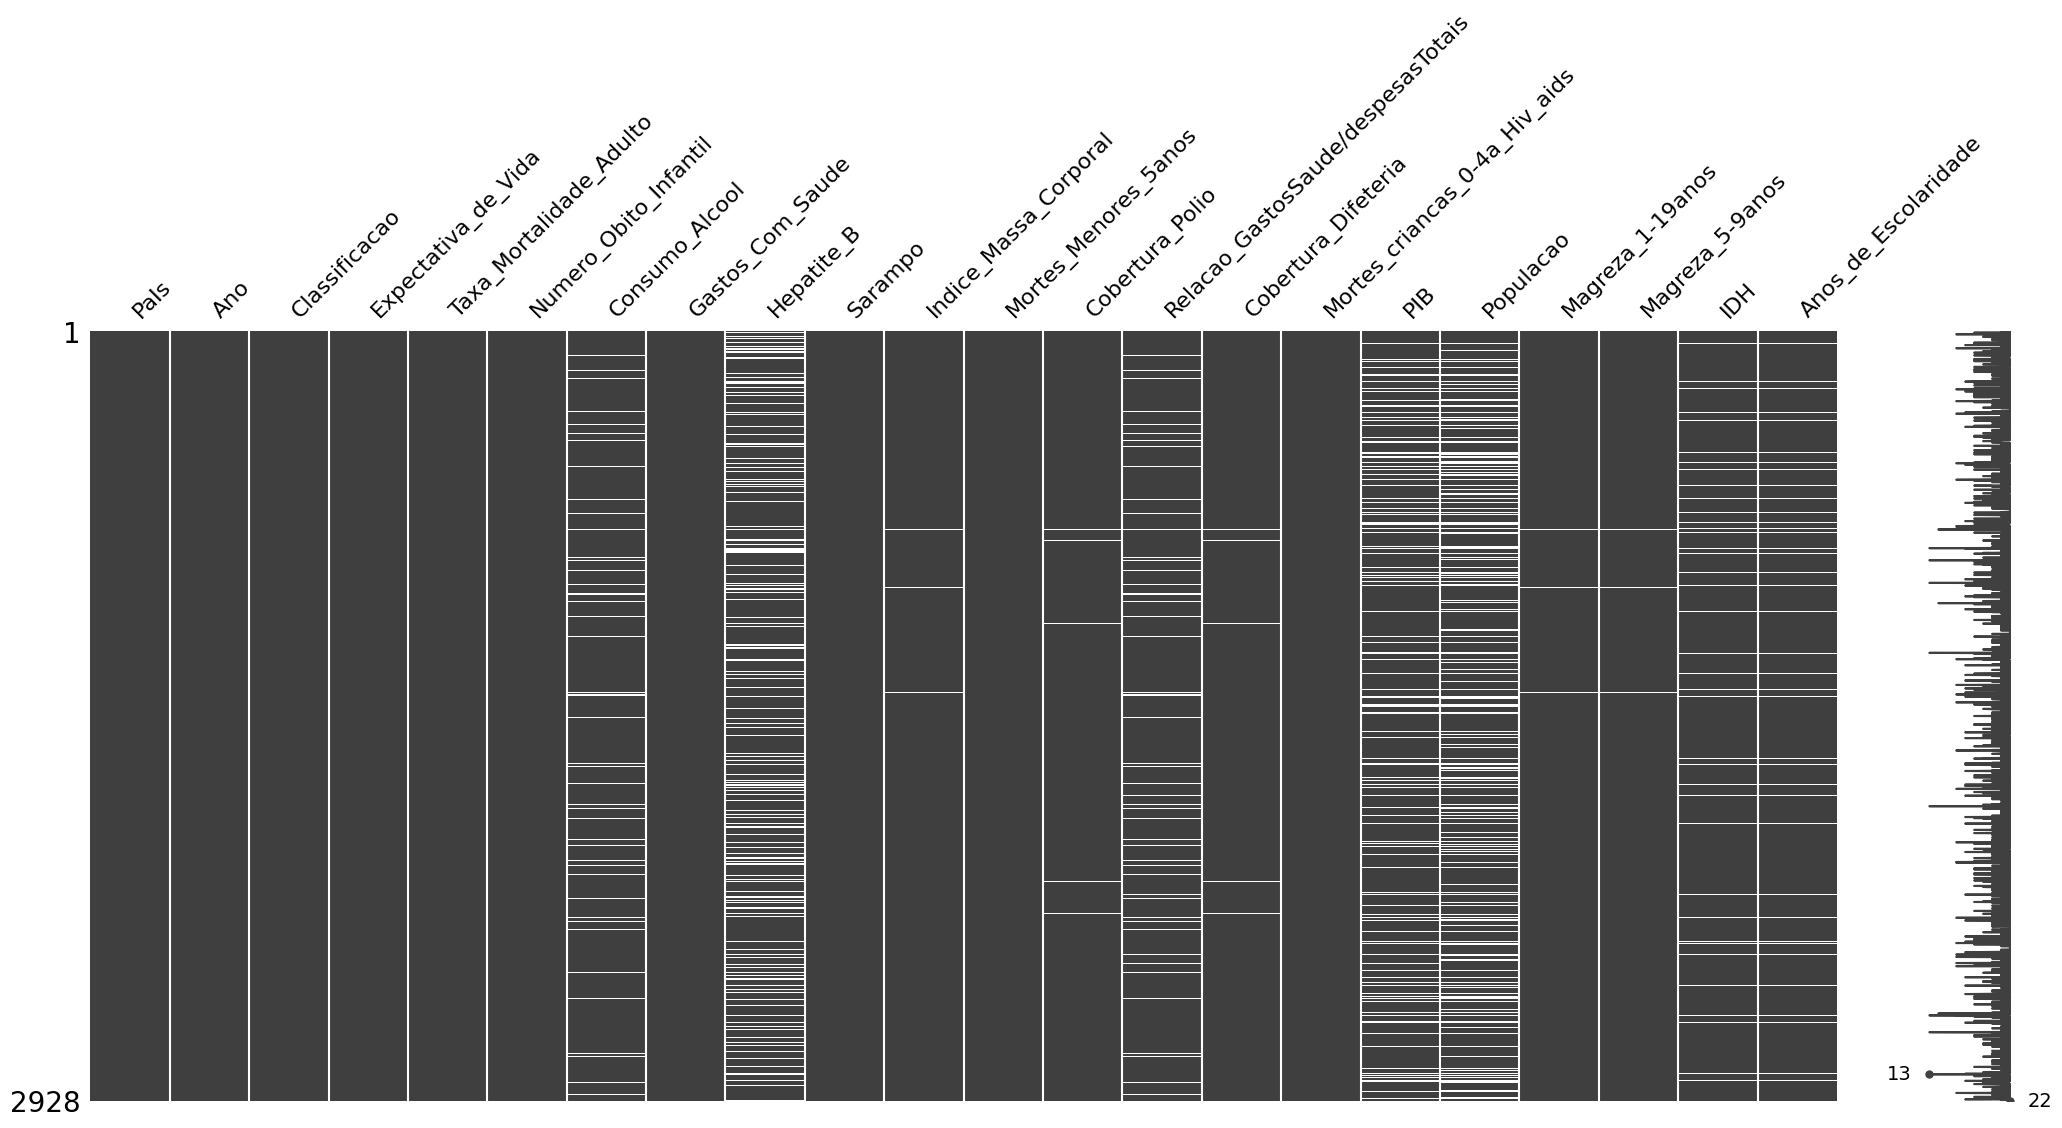

In [23]:
ax = msno.matrix(df.sample(2928))
ax.get_figure().savefig("DADOS_AUSENTES.png")


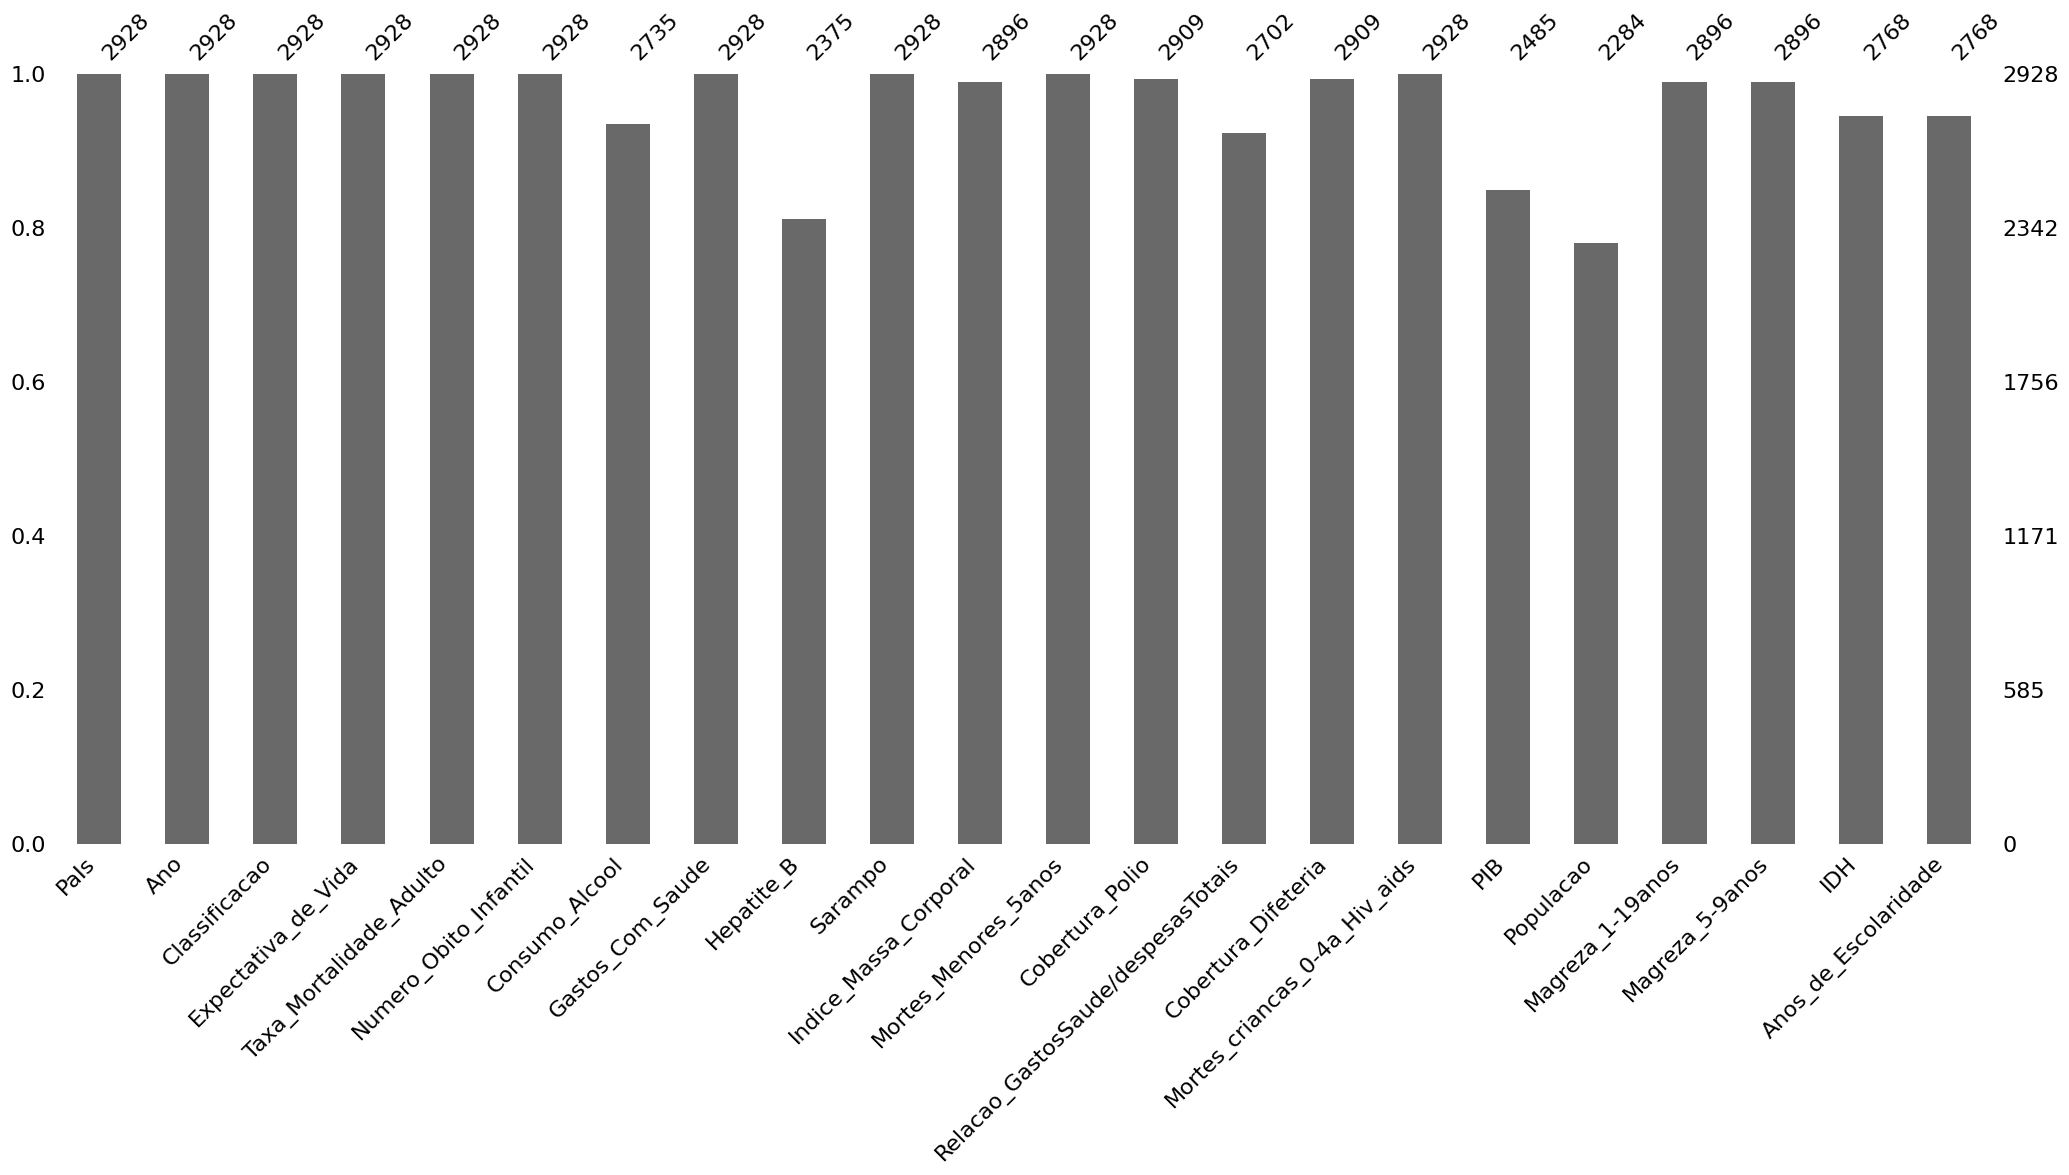

In [24]:
ax = msno.bar(df.sample(2928))
ax.get_figure().savefig("DADOS_AUSENTES.png")


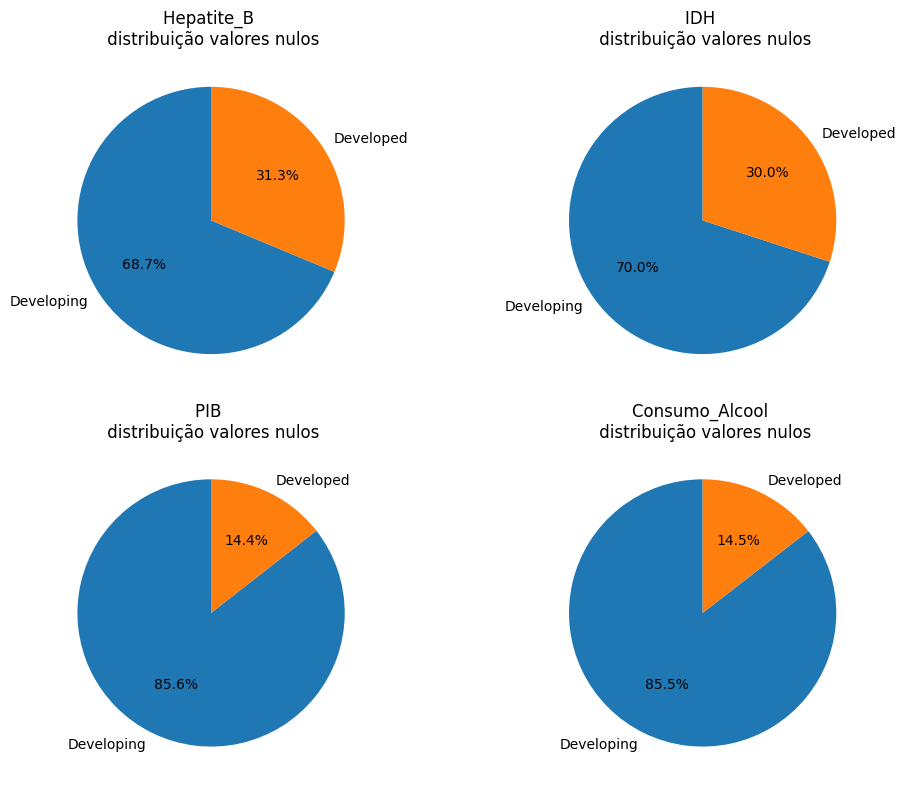

In [25]:
# Distribuição de valores nulos no dataset entre países desenvolvidos e em desenvolvimento. 
coluna_null = ['Hepatite_B','IDH','PIB','Consumo_Alcool']
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
 # colocar titulo
for i,var in enumerate(coluna_null):
    if i < len(axs.flat):
        df_filtro = (
        df.query(f'{var}.isnull()')
       .groupby(['Classificacao'])
       .agg({'PaIs': 'count'})
       .sort_values('PaIs',ascending=False)
       .reset_index()
)
        axs.flat[i].pie(df_filtro['PaIs'],labels=df_filtro['Classificacao'],autopct='%.1f%%',startangle=90)
        axs.flat[i].set_title(f'{var} \n distribuição valores nulos')

fig.tight_layout()
ax.get_figure().savefig("DADOS_AUSEN.png")
#

In [26]:
# Substituir os dados parcialmente faltantes com a média 2000-2015 para cada país.
def imputar (df):
    media = df.mean()
    return df.fillna(media)
df_full = df.groupby('PaIs').apply(imputar)

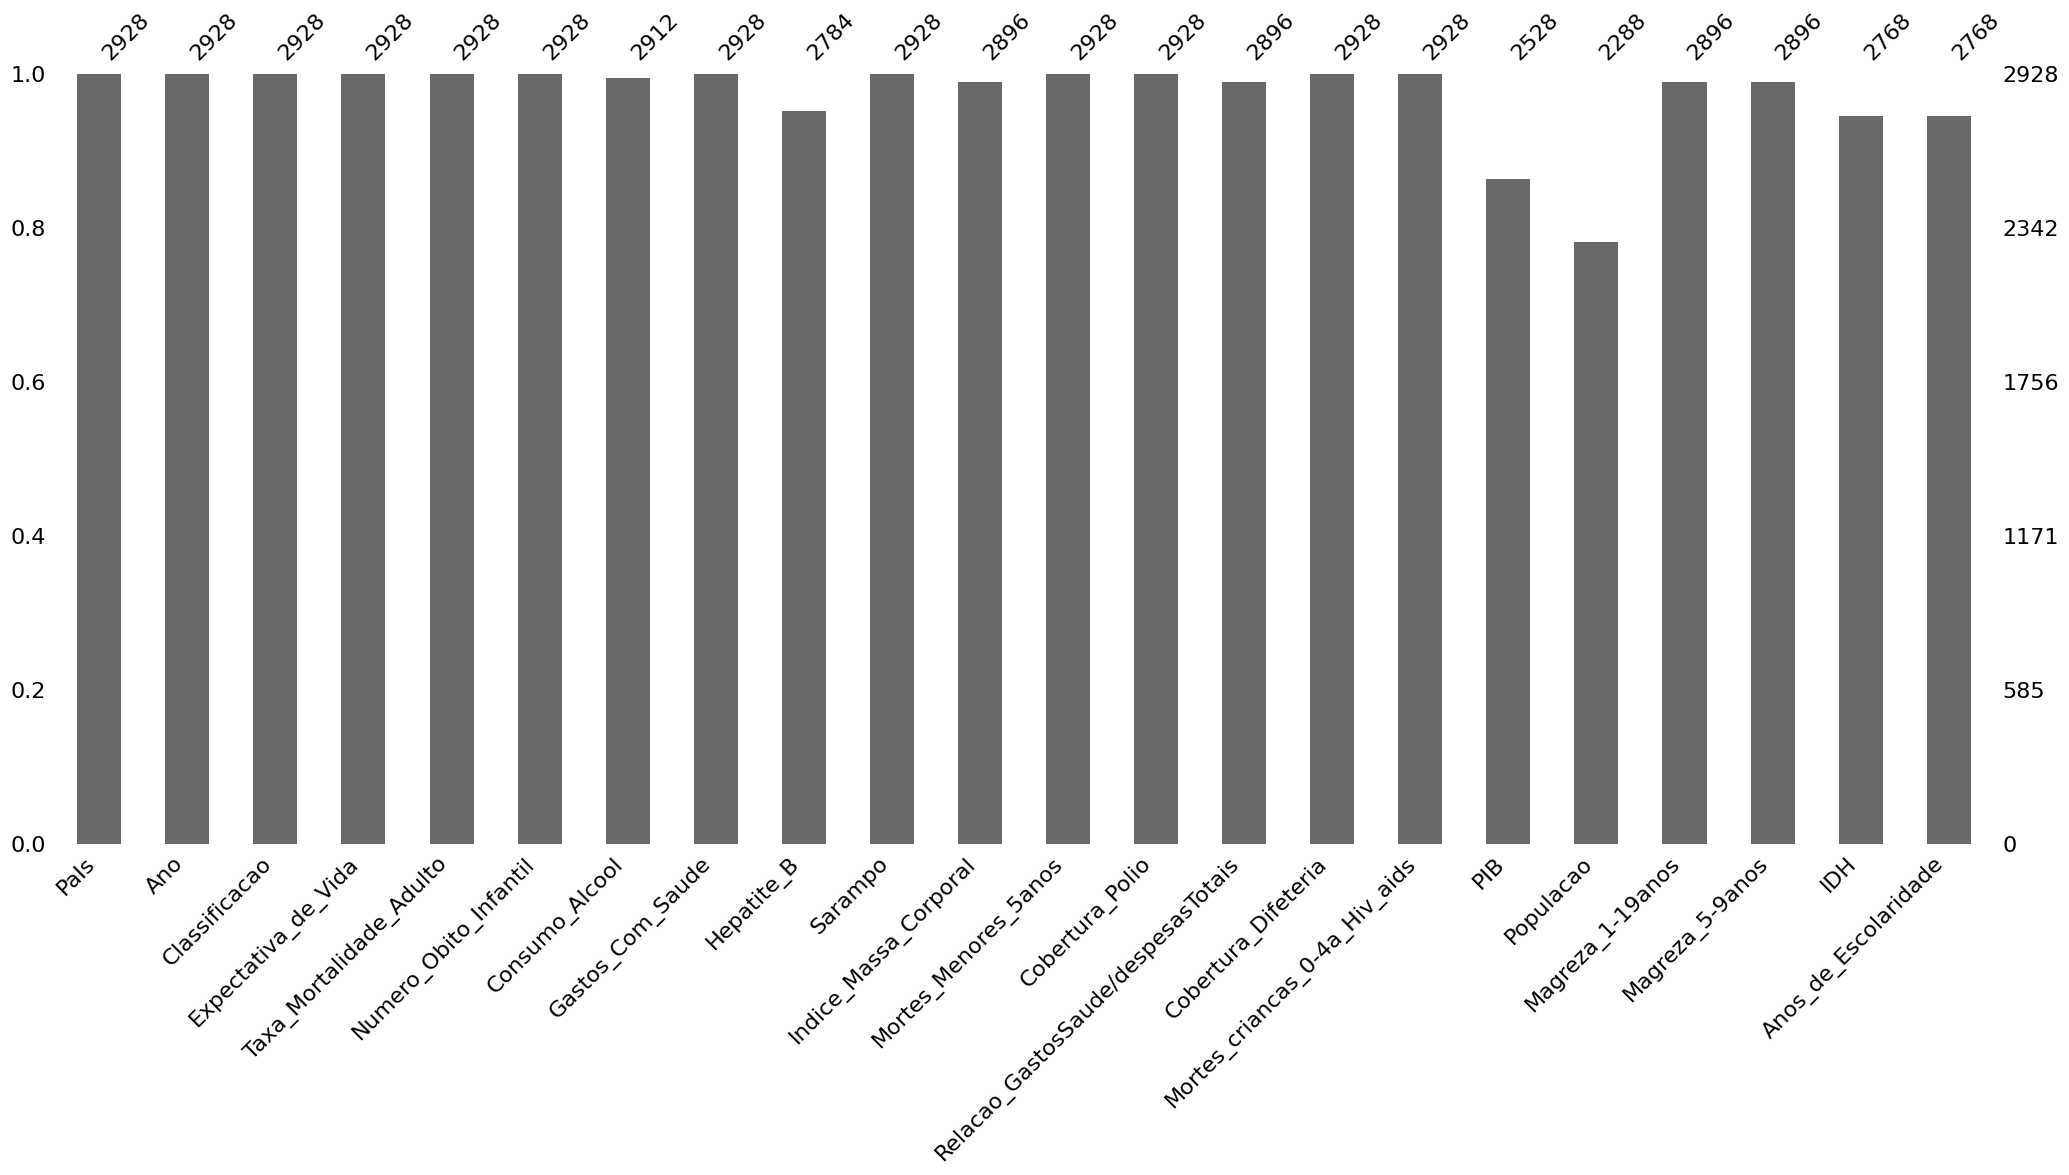

In [27]:
ax = msno.bar(df_full.sample(2928))
ax.get_figure().savefig("DADOS_AUSENTES_2000-2015.png")

In [28]:
# Substituir os dados totalmente faltantes por país considerando a mediana separada por países desenvolvidos e países em desenvolvimento.
def imputar (df):
    mediana = df.median()
    return df.fillna(mediana)
df_full_final = df_full.groupby('Classificacao').apply(imputar)

In [29]:
eua = df_full_final.query('PaIs=="United States of America"') # .91 https://www.undp.org/pt/brazil/idh-global-2014
eua.head(2)

,PaIs,Ano,Classificacao,Expectativa_de_Vida,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,Indice_Massa_Corporal,Mortes_Menores_5anos,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
2794,United States of America,2015,Developed,79.3,13.0,23,8.579333,0.0,92.0,188,69.6,26,93.0,15.863333,95.0,0.1,13560.72386,1167660.0,0.8,0.6,0.862,15.8
2795,United States of America,2014,Developed,79.1,14.0,23,8.820000,0.0,92.0,667,69.1,27,93.0,17.140000,95.0,0.1,13560.72386,1167660.0,0.8,0.6,0.862,15.8


In [30]:
somalia = df_full_final.query('PaIs=="United Republic of Tanzania"') # .54 https://www.undp.org/pt/brazil/idh-global-2014
somalia.head()

,PaIs,Ano,Classificacao,Expectativa_de_Vida,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,Indice_Massa_Corporal,Mortes_Menores_5anos,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
2778,United Republic of Tanzania,2015,Developing,61.8,279.0,85,3.582667,0.0,98.0,30,23.8,119,96.0,4.701333,98.0,1.4,1216.21457,1423409.0,6.7,6.5,0.631,11.7
2779,United Republic of Tanzania,2014,Developing,67.0,34.0,86,0.010000,0.0,97.0,88,23.2,121,97.0,5.580000,97.0,1.4,1216.21457,1423409.0,6.8,6.6,0.631,11.7
2780,United Republic of Tanzania,2013,Developing,59.7,323.0,86,4.200000,0.0,91.0,185,22.5,124,91.0,5.570000,91.0,2.1,1216.21457,1423409.0,6.8,6.7,0.631,11.7
2781,United Republic of Tanzania,2012,Developing,58.6,348.0,87,3.980000,0.0,92.0,1668,21.9,126,9.0,5.720000,92.0,2.4,1216.21457,1423409.0,6.9,6.8,0.631,11.7
2782,United Republic of Tanzania,2011,Developing,58.3,348.0,88,4.040000,0.0,9.0,1622,21.3,128,88.0,5.720000,9.0,3.1,1216.21457,1423409.0,7.0,6.9,0.631,11.7


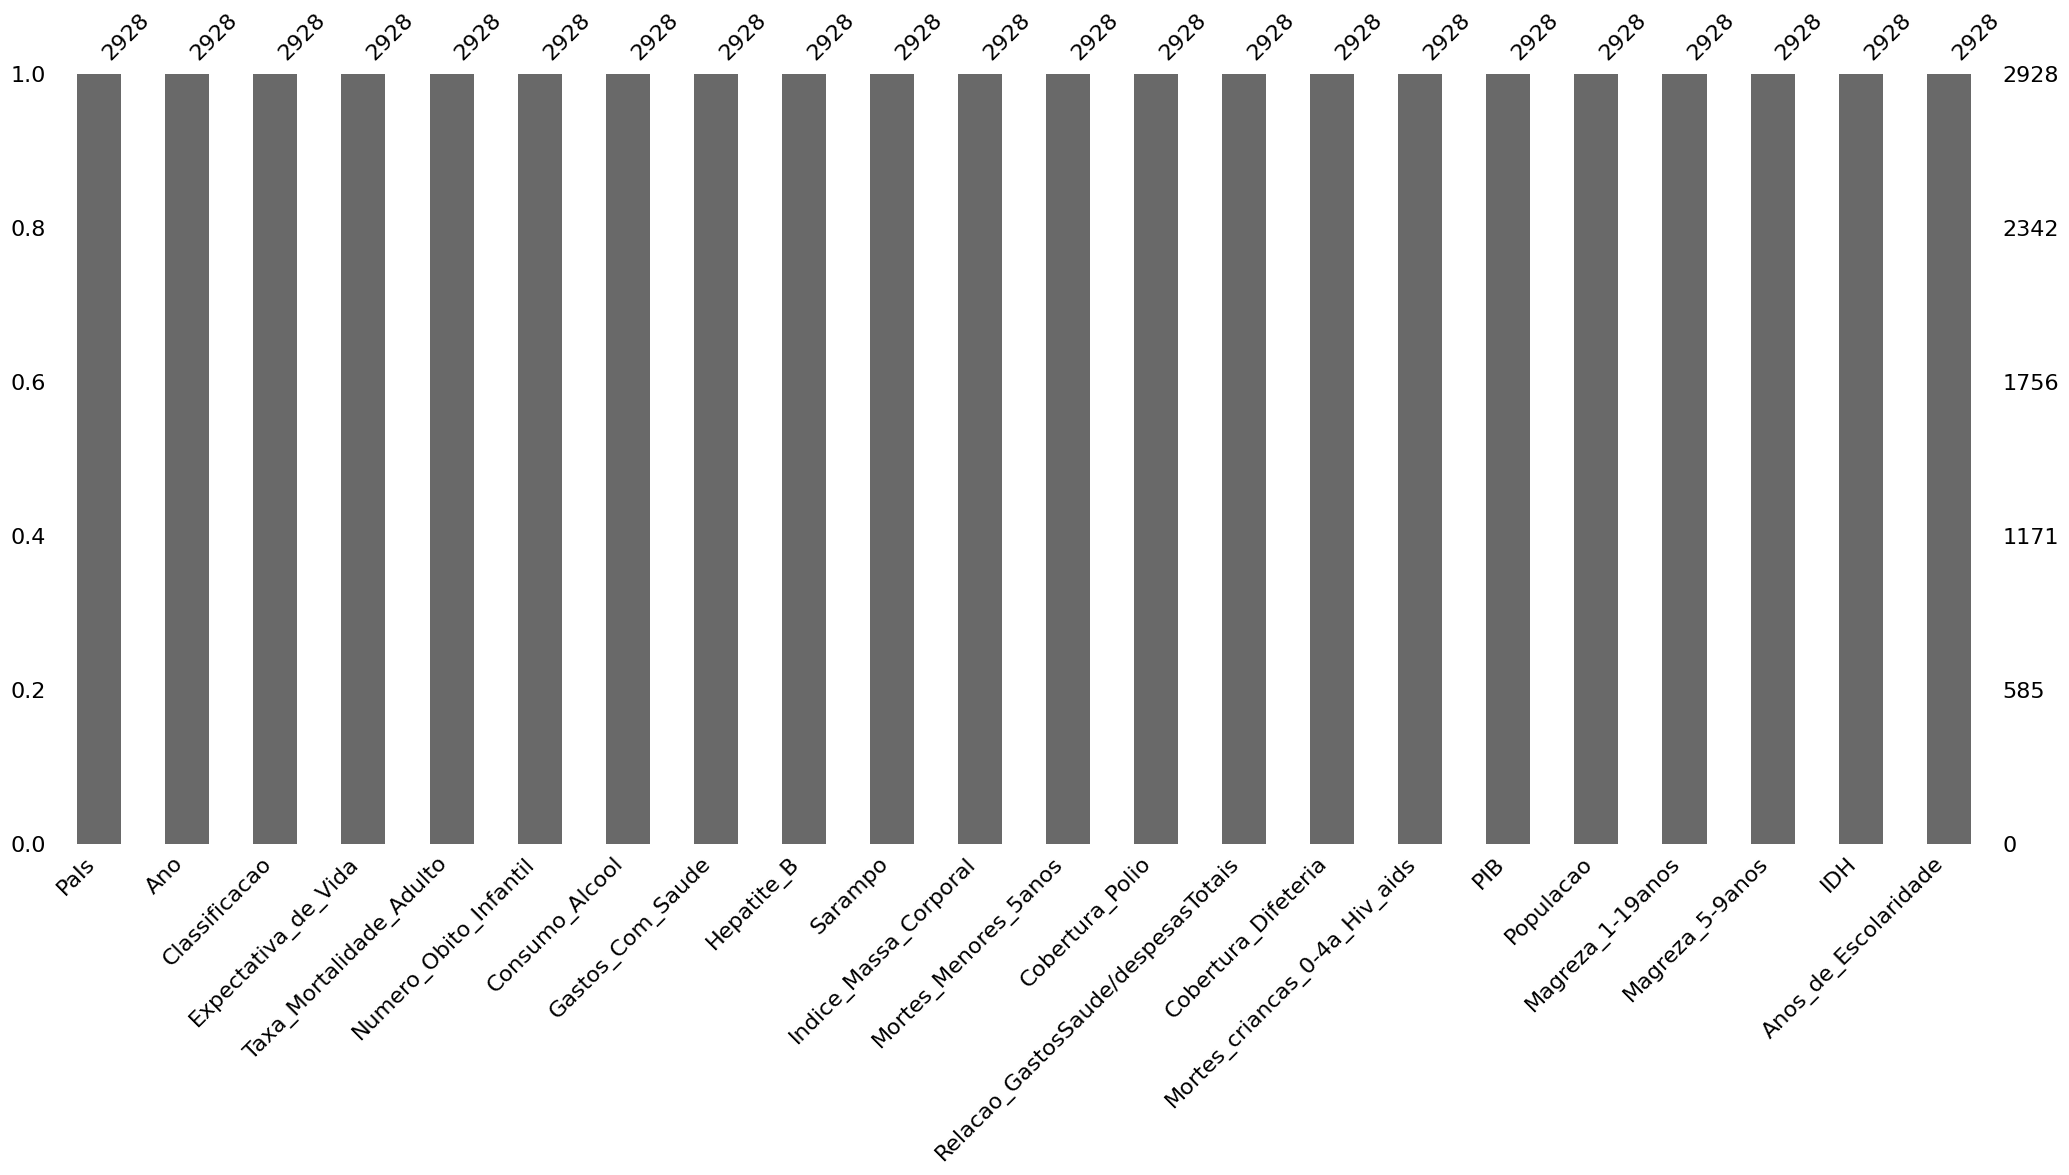

In [31]:
ax = msno.bar(df_full_final.sample(2928))
ax.get_figure().savefig("DADOS_AUSENTES_final.png")

In [32]:
df_full_final.columns

Index(['PaIs', 'Ano', 'Classificacao', 'Expectativa_de_Vida',
       'Taxa_Mortalidade_Adulto', 'Numero_Obito_Infantil', 'Consumo_Alcool',
       'Gastos_Com_Saude', 'Hepatite_B', 'Sarampo', 'Indice_Massa_Corporal',
       'Mortes_Menores_5anos', 'Cobertura_Polio',
       'Relacao_GastosSaude/despesasTotais', 'Cobertura_Difeteria',
       'Mortes_criancas_0-4a_Hiv_aids', 'PIB', 'Populacao', 'Magreza_1-19anos',
       'Magreza_5-9anos', 'IDH', 'Anos_de_Escolaridade'],
      dtype='object')

In [33]:
df_full_final.describe().T # análise estatística descritiva

,count,mean,std,min,25%,50%,75%,max
Ano,2928.0,2.007500e+03,4.610560e+00,2000.00000,2003.750000,2.007500e+03,2.011250e+03,2.015000e+03
Expectativa_de_Vida,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Taxa_Mortalidade_Adulto,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
Numero_Obito_Infantil,2928.0,3.040745e+01,1.181144e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Consumo_Alcool,2928.0,4.601004e+00,4.029120e+00,0.01000,0.950000,3.701333e+00,7.680000e+00,1.787000e+01
Gastos_Com_Saude,2928.0,7.403212e+02,1.990931e+03,0.00000,4.853964,6.561145e+01,4.426143e+02,1.947991e+04
Hepatite_B,2928.0,7.937904e+01,2.472349e+01,1.00000,73.500000,9.087500e+01,9.600000e+01,9.900000e+01
Sarampo,2928.0,2.427856e+03,1.148597e+04,0.00000,0.000000,1.700000e+01,3.622500e+02,2.121830e+05
Indice_Massa_Corporal,2928.0,3.820167e+01,1.985278e+01,1.00000,19.400000,4.300000e+01,5.610000e+01,7.760000e+01
Mortes_Menores_5anos,2928.0,4.217930e+01,1.607005e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


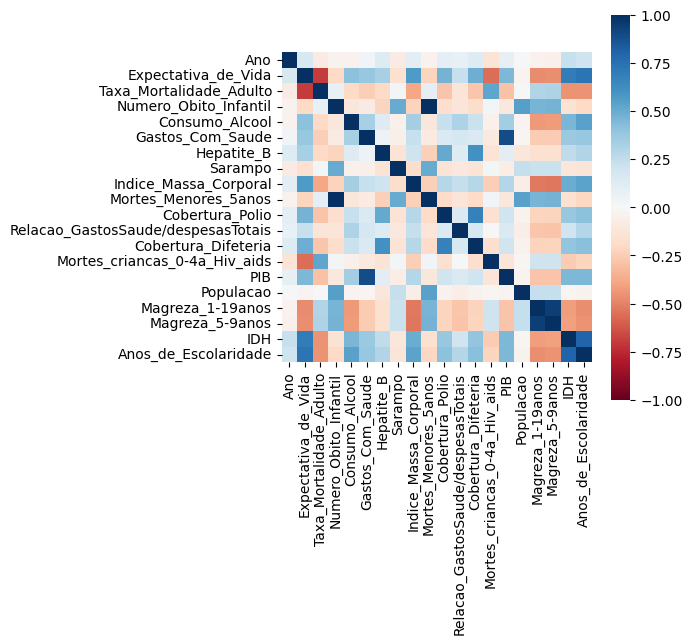

In [34]:
corrmat = df_full_final.corr() # verificar
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corrmat, vmax=1,vmin=-1, cmap='RdBu', square=True);
ax.get_figure().savefig("Correlação.png")

In [35]:
df_full_final

,PaIs,Ano,Classificacao,Expectativa_de_Vida,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,Indice_Massa_Corporal,Mortes_Menores_5anos,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [36]:
df_full_final.to_csv('Expectativa_de_vida_tratado.csv', index=False,encoding="utf-8")

In [37]:
df_novo = pd.read_csv('Expectativa_de_vida_tratado.csv')

In [38]:
df_novo

,PaIs,Ano,Classificacao,Expectativa_de_Vida,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,Indice_Massa_Corporal,Mortes_Menores_5anos,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2926,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
